In [40]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import math
import random
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, explained_variance_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression

linreg = LinearRegression()
sb.set() # set the default Seaborn style for graphics

In [41]:
births = pd.read_csv('Datasets/Birth_Rate_clean.csv')

births = births.rename(columns = {'Data Series':'Date'})
births.set_index('Date',inplace=True)
births = births.rename(columns=lambda x: x.strip())
births.columns = pd.DatetimeIndex(births.columns).to_period('M')

births = births.T
births = births.rename(columns=lambda x: x.strip())
births = births.sort_index()
births.head()

Date,Total Live-Births By Ethnic Group,Malays,Chinese,Indians,Other Ethnic Groups,Total Male Live-Births By Ethnic Group,Malays,Chinese,Indians,Other Ethnic Groups,Total Female Live-Births By Ethnic Group,Malays,Chinese,Indians,Other Ethnic Groups
1960-01,4981,838,3589,467,87,2621,444,1888,240,49,2360,394,1701,227,38
1960-02,4596,836,3290,377,93,2430,434,1767,185,44,2166,402,1523,192,49
1960-03,4964,849,3639,384,92,2568,431,1883,206,48,2396,418,1756,178,44
1960-04,4904,843,3610,364,87,2516,450,1834,185,47,2388,393,1776,179,40
1960-05,5244,872,3868,392,112,2658,440,1958,196,64,2586,432,1910,196,48


<AxesSubplot:>

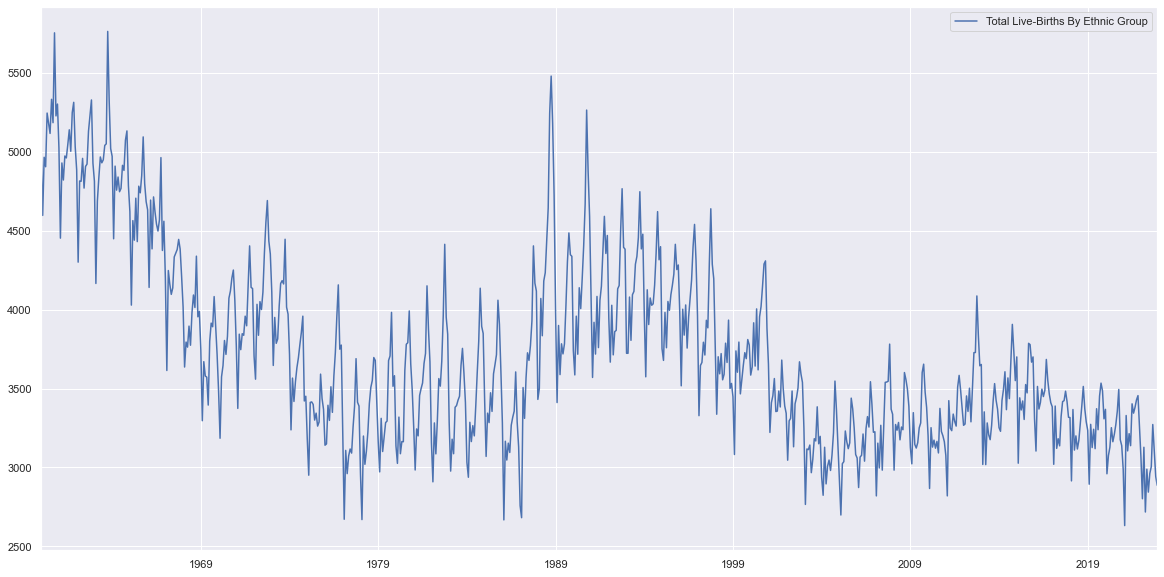

In [42]:
births = pd.DataFrame(births['Total Live-Births By Ethnic Group'])

births.head()
births = births.astype('int64')
births.plot(figsize=(20, 10))

In [50]:
fwf = pd.read_csv('Datasets/FemaleWorkForce_clean.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#set data series as index and convert to date time
fwf = fwf.rename(columns = {'Data Series':'Date'})
fwf.set_index('Date',inplace=True)
fwf = fwf.rename(columns=lambda x: x.strip())
fwf.columns = pd.DatetimeIndex(fwf.columns).to_period('M')


fwf = fwf.T
fwf = fwf.rename(columns=lambda x: x.strip())
fwf = fwf.reindex()
fwf = fwf.replace('na',np.nan)
fwf = fwf.resample('M').pad()
fwf = fwf.apply(lambda x: (pd.to_numeric(x, errors='coerce') * 1000 / 12).apply(math.floor).astype('int64'))
fwf.head()
#print(cpi.index.name)

Date,Female Residents In The Labour Force,15 - 19 Years,20 - 24 Years,25 - 29 Years,30 - 34 Years,35 - 39 Years,40 - 44 Years,45 - 49 Years,50 - 54 Years,55 - 59 Years,60 - 64 Years,65 Years & Over,Female Employed Residents,15 - 19 Years,20 - 24 Years,25 - 29 Years,30 - 34 Years,35 - 39 Years,40 - 44 Years,45 - 49 Years,50 - 54 Years,55 - 59 Years,60 - 64 Years,65 Years & Over
1990-01,42025,2200,7358,8750,7450,5758,4475,2408,1725,933,483,466,41333,2075,7150,8616,7375,5700,4425,2383,1716,933,483,466
1990-02,42025,2200,7358,8750,7450,5758,4475,2408,1725,933,483,466,41333,2075,7150,8616,7375,5700,4425,2383,1716,933,483,466
1990-03,42025,2200,7358,8750,7450,5758,4475,2408,1725,933,483,466,41333,2075,7150,8616,7375,5700,4425,2383,1716,933,483,466
1990-04,42025,2200,7358,8750,7450,5758,4475,2408,1725,933,483,466,41333,2075,7150,8616,7375,5700,4425,2383,1716,933,483,466
1990-05,42025,2200,7358,8750,7450,5758,4475,2408,1725,933,483,466,41333,2075,7150,8616,7375,5700,4425,2383,1716,933,483,466


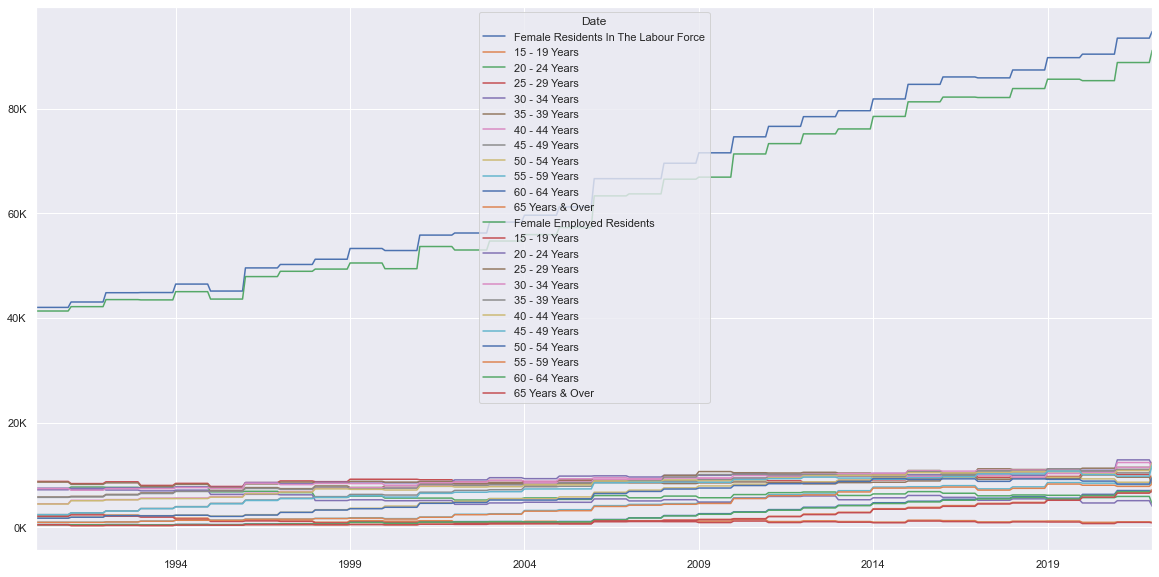

In [51]:
ax = fwf.plot(figsize=(20, 10))
ax.yaxis.set_major_locator(plt.FixedLocator(ax.get_yticks()))
ax.set_yticklabels([f'{int(x/1000)}K' for x in ax.get_yticks()])
plt.show()

In [91]:
print(fwf.iloc[:, 2:9].sum(axis = 1))
print(fwf.iloc[:, 14:21].sum(axis = 1))

1990-01    37924
1990-02    37924
1990-03    37924
1990-04    37924
1990-05    37924
1990-06    37924
1990-07    37924
1990-08    37924
1990-09    37924
1990-10    37924
1990-11    37924
1990-12    37924
1991-01    38864
1991-02    38864
1991-03    38864
1991-04    38864
1991-05    38864
1991-06    38864
1991-07    38864
1991-08    38864
1991-09    38864
1991-10    38864
1991-11    38864
1991-12    38864
1992-01    40681
1992-02    40681
1992-03    40681
1992-04    40681
1992-05    40681
1992-06    40681
1992-07    40681
1992-08    40681
1992-09    40681
1992-10    40681
1992-11    40681
1992-12    40681
1993-01    40815
1993-02    40815
1993-03    40815
1993-04    40815
1993-05    40815
1993-06    40815
1993-07    40815
1993-08    40815
1993-09    40815
1993-10    40815
1993-11    40815
1993-12    40815
1994-01    42473
1994-02    42473
1994-03    42473
1994-04    42473
1994-05    42473
1994-06    42473
1994-07    42473
1994-08    42473
1994-09    42473
1994-10    42473
1994-11    424

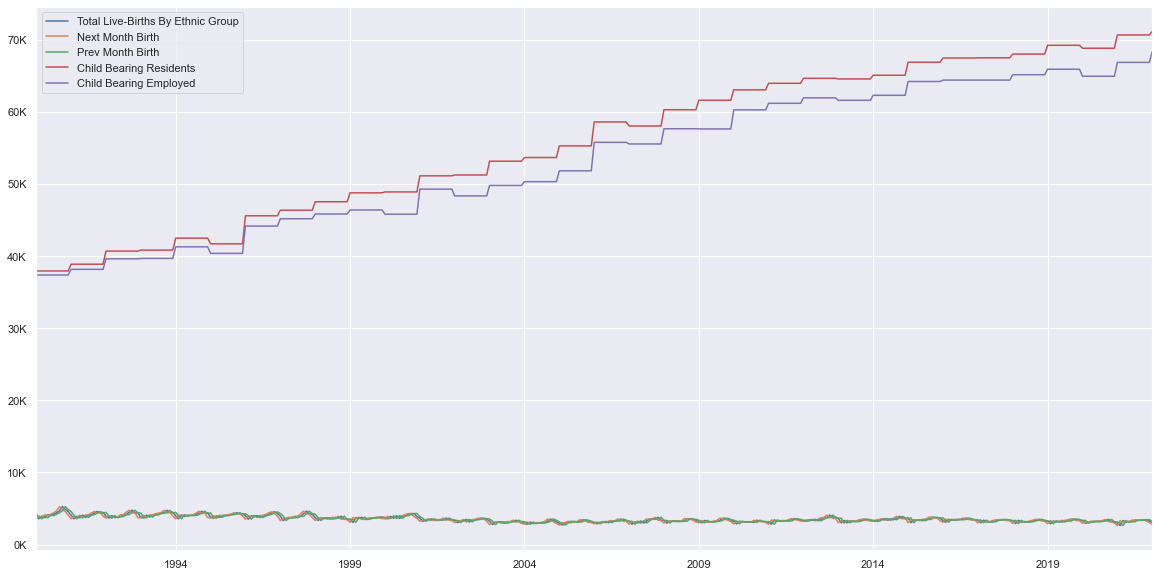

In [92]:
labourbirths = pd.DataFrame(births['Total Live-Births By Ethnic Group'])
labourbirths['Next Month Birth'] = labourbirths['Total Live-Births By Ethnic Group'].shift(-1)
labourbirths['Prev Month Birth'] = labourbirths['Total Live-Births By Ethnic Group'].shift(1)

#femalelabourforce = labourbirths.join(fwf['Female Residents In The Labour Force'], how='inner')
#femaleemployed = labourbirths.join(fwf['Female Employed Residents'], how='inner')

fwf['Child Bearing Residents'] = fwf.iloc[:, 2:9].sum(axis = 1)
fwf['Child Bearing Employed'] = fwf.iloc[:, 14:21].sum(axis = 1)

cbResidents = labourbirths.join(fwf['Child Bearing Residents'], how='inner')
cbEmployed = labourbirths.join(fwf['Child Bearing Employed'], how='inner')

#print(cbResidents)
#print(cbEmployed)

#labourMerge = pd.concat([femalelabourforce,femaleemployed], axis=1, join='inner')
labourMerge = pd.concat([cbResidents,cbEmployed], axis=1, join='inner')
labourMerge = labourMerge.loc[:,~labourMerge.columns.duplicated(keep='first')]

ax = labourMerge.plot(figsize=(20, 10))
ax.yaxis.set_major_locator(plt.FixedLocator(ax.get_yticks()))
ax.set_yticklabels([f'{int(x/1000)}K' for x in ax.get_yticks()])
plt.show()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 385 entries, 1990-01 to 2022-01
Freq: M
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Live-Births By Ethnic Group  385 non-null    int64  
 1   Next Month Birth                   385 non-null    float64
 2   Prev Month Birth                   385 non-null    float64
 3   Child Bearing Residents            385 non-null    int64  
 4   Child Bearing Employed             385 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 26.1 KB


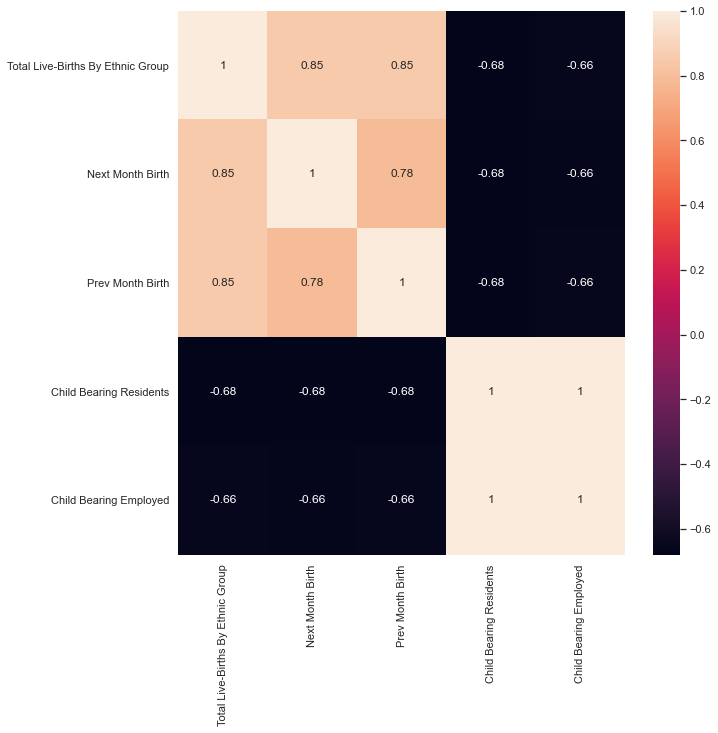

In [93]:
labourMerge.info()
labourMerge.corr()

corr_matrix = labourMerge.corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr_matrix, annot=True)
plt.show()

In [96]:
resultsRf = []

for i in range(250):
    seed = random.randint(0, 10000)
    num_folds = 5
    
    # Step 1: Create binary target variable
    labourMerge['Prediction'] = (labourMerge['Total Live-Births By Ethnic Group'] > labourMerge['Next Month Birth']).astype(int)

    # Step 2: Combine features into single dataframe
    # Step 2.1: Predictors
    x = labourMerge[['Total Live-Births By Ethnic Group', 'Prev Month Birth', 'Child Bearing Residents', 'Child Bearing Employed']]
    
    # Step 2.2: Response
    y = labourMerge['Prediction']

    # Step 3: Split data into training and test sets
    kResRf = []
    kf = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

    # Step 4: Create Random Forest Classifier object
    for fold, (train_idx, test_idx) in enumerate(kf.split(x)):
        # Step 4.1: Split data into training and test sets
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Step 4.2: Creating Random Forest and Logistic Regression Classifier
        rf = RandomForestClassifier(max_depth=10)
        
        # Step 4.3: Fit model to training data
        rf.fit(x_train, y_train)
        
        # Step 4.4: Make predictions on test data
        y_pred_rf = rf.predict(x_test)
        
        # Step 4.5: Evalute performance
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        precision_rf = precision_score(y_test, y_pred_rf)
        recall_rf = recall_score(y_test, y_pred_rf)
        f1_rf = f1_score(y_test, y_pred_rf)
        
        kResRf.append((fold, accuracy_rf, precision_rf, recall_rf, f1_rf))

    # Step 5: Fit model to training data
    rf.fit(x_train, y_train)

    # Step 6: Make predictions on test data
    acc_mean_rf, acc_std_rf = np.mean([r[1] for r in kResRf]), np.std([r[1] for r in kResRf])
    prec_mean_rf, prec_std_rf = np.mean([r[2] for r in kResRf]), np.std([r[2] for r in kResRf])
    rec_mean_rf, rec_std_rf = np.mean([r[3] for r in kResRf]), np.std([r[3] for r in kResRf])
    f1_mean_rf, f1_std_rf = np.mean([r[4] for r in kResRf]), np.std([r[4] for r in kResRf])
    
    resultsRf.append((seed, acc_mean_rf, acc_std_rf, prec_mean_rf, prec_std_rf, rec_mean_rf, rec_std_rf, f1_mean_rf, f1_std_rf))

# Sort results by F1 score in descending order
resultsRf.sort(key=lambda x: x[7], reverse=True)

In [97]:
resultsLr = []

for i in range(5):
    seed = resultsRf[i][0]
    kResLr = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(x)):
        X_train, X_test = x.iloc[train_idx], x.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        lr = LogisticRegression(max_iter=1000, solver='liblinear')
        lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        
        accuracy_lr = accuracy_score(y_test, y_pred_lr)
        precision_lr = precision_score(y_test, y_pred_lr)
        recall_lr = recall_score(y_test, y_pred_lr)
        f1_lr = f1_score(y_test, y_pred_lr)
        kResLr.append((fold, accuracy_lr, precision_lr, recall_lr, f1_lr))
        
    acc_mean_lr, acc_std_lr = np.mean([r[1] for r in kResLr]), np.std([r[1] for r in kResLr])
    prec_mean_lr, prec_std_lr = np.mean([r[2] for r in kResLr]), np.std([r[2] for r in kResLr])
    rec_mean_lr, rec_std_lr = np.mean([r[3] for r in kResLr]), np.std([r[3] for r in kResLr])
    f1_mean_lr, f1_std_lr = np.mean([r[4] for r in kResLr]), np.std([r[4] for r in kResLr])   
    resultsLr.append((seed, acc_mean_lr, acc_std_lr, prec_mean_lr, prec_std_lr, rec_mean_lr, rec_std_lr, f1_mean_lr, f1_std_lr))

In [98]:
topResultsRf = resultsRf[:5]

for i in range(5):
    print('----------------------------------------------')
    print(f"Random state {topResultsRf[i][0]}:")
    print(f'Accuracy  = {topResultsRf[i][1]:.4f} +/- {topResultsRf[i][2]:.4f}  vs  {resultsLr[i][1]:.4f} +/- {resultsLr[i][2]:.4f}')
    print(f'Precision = {topResultsRf[i][3]:.4f} +/- {topResultsRf[i][4]:.4f}  vs  {resultsLr[i][3]:.4f} +/- {resultsLr[i][4]:.4f}')
    print(f'Recall    = {topResultsRf[i][5]:.4f} +/- {topResultsRf[i][6]:.4f}  vs  {resultsLr[i][5]:.4f} +/- {resultsLr[i][6]:.4f}')
    print(f'F1 score  = {topResultsRf[i][7]:.4f} +/- {topResultsRf[i][8]:.4f}  vs  {resultsLr[i][7]:.4f} +/- {resultsLr[i][8]:.4f}')
print('----------------------------------------------')

----------------------------------------------
Random state 49:
Accuracy  = 0.7039 +/- 0.0352  vs  0.5818 +/- 0.0208
Precision = 0.6920 +/- 0.0587  vs  0.5751 +/- 0.0694
Recall    = 0.7122 +/- 0.0521  vs  0.5616 +/- 0.0495
F1 score  = 0.6989 +/- 0.0298  vs  0.5632 +/- 0.0263
----------------------------------------------
Random state 831:
Accuracy  = 0.7039 +/- 0.0352  vs  0.5818 +/- 0.0208
Precision = 0.7001 +/- 0.0783  vs  0.5751 +/- 0.0694
Recall    = 0.7068 +/- 0.0568  vs  0.5616 +/- 0.0495
F1 score  = 0.6976 +/- 0.0238  vs  0.5632 +/- 0.0263
----------------------------------------------
Random state 2401:
Accuracy  = 0.7065 +/- 0.0373  vs  0.5818 +/- 0.0208
Precision = 0.6961 +/- 0.0413  vs  0.5751 +/- 0.0694
Recall    = 0.7025 +/- 0.0678  vs  0.5616 +/- 0.0495
F1 score  = 0.6972 +/- 0.0406  vs  0.5632 +/- 0.0263
----------------------------------------------
Random state 4705:
Accuracy  = 0.6987 +/- 0.0277  vs  0.5818 +/- 0.0208
Precision = 0.6833 +/- 0.0515  vs  0.5751 +/- 0.06

In [99]:
print(f'Average Accuracy:  {sum([i[1] for i in topResultsRf])/5:.4f}  vs  {sum([i[1] for i in resultsLr])/5:.4f}')
print(f'Average Precision: {sum([i[3] for i in topResultsRf])/5:.4f}  vs  {sum([i[3] for i in resultsLr])/5:.4f}')
print(f'Average Recall:    {sum([i[5] for i in topResultsRf])/5:.4f}  vs  {sum([i[5] for i in resultsLr])/5:.4f}')
print(f'Average F1 Score:  {sum([i[7] for i in topResultsRf])/5:.4f}  vs  {sum([i[7] for i in resultsLr])/5:.4f}')

Average Accuracy:  0.7023  vs  0.5818
Average Precision: 0.6919  vs  0.5751
Average Recall:    0.7105  vs  0.5616
Average F1 Score:  0.6967  vs  0.5632
